<a href="https://colab.research.google.com/github/sangeethapk/AI-ML/blob/main/CaseStudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import seaborn as sns
import pandas as pd
import matplotlib as plt


In [108]:
# load data
df=pd.read_csv('/content/train_loan (1).csv')
#display fist 5 value
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [109]:
# get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [110]:
#find duplicatedvalues
df.duplicated().sum()

np.int64(0)

In [111]:
# find missing values
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [112]:
#in percentage
round(df.isnull().mean()*100,2)

,0
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


In [113]:
# Very less missing values so we go for imputation using sklearn
from sklearn.impute import SimpleImputer
for col in df.columns:
  if df[col].dtype in ['int64','float64']:
    imputer=SimpleImputer(strategy='median')
  else:
    imputer=SimpleImputer(strategy='most_frequent')

  imputer.fit(df[[col]])
  df[col]=imputer.transform(df[[col]]).ravel()

In [114]:
round(df.isnull().mean()*100,2)

,0
Loan_ID,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


Outlier

In [115]:
#Check for outlier
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: >

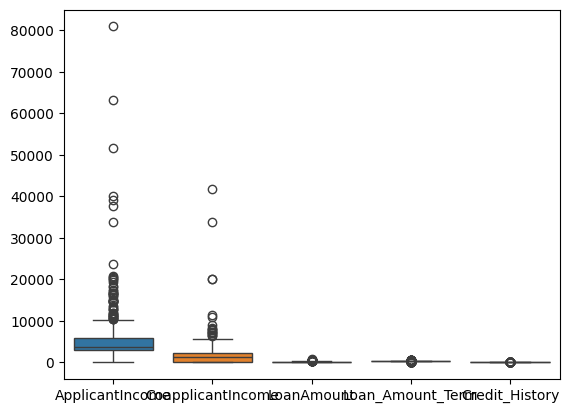

In [116]:
#ApplicantIncome and CoapplicantIncome looks highly skewed, draw a box diagram to find this
sns.boxplot(df)

<Axes: ylabel='ApplicantIncome'>

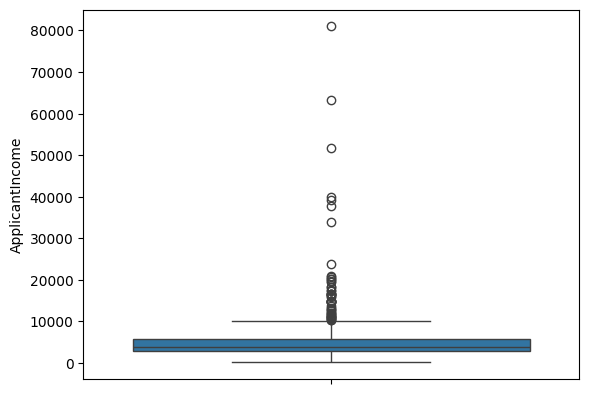

In [117]:
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

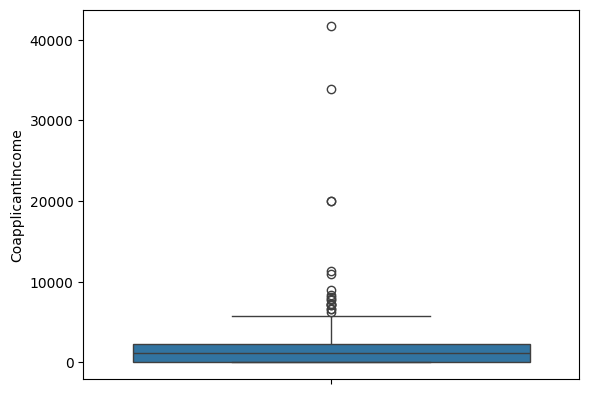

In [118]:
sns.boxplot(df['CoapplicantIncome'])

In [119]:
#Using IQR remove outliers
q1=df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df=df[(df['ApplicantIncome']<upper_limit) & (df['ApplicantIncome']>lower_limit)]

<Axes: ylabel='ApplicantIncome'>

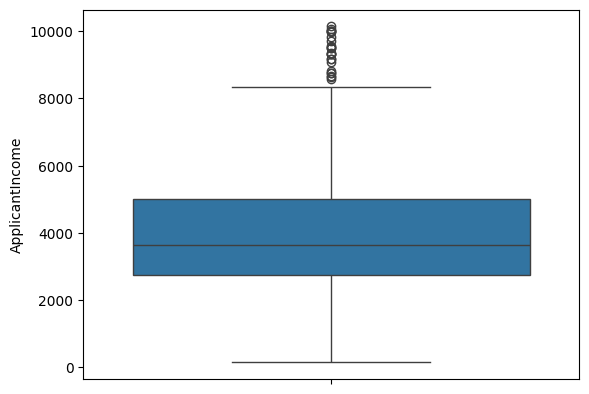

In [120]:
sns.boxplot(df['ApplicantIncome'])

In [121]:
#remove outlier from coapplicants
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df=df[(df['CoapplicantIncome']<upper_limit) & (df['CoapplicantIncome']>lower_limit)]


<Axes: ylabel='CoapplicantIncome'>

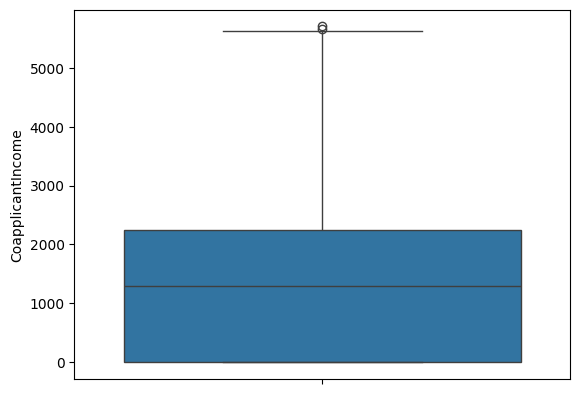

In [122]:
sns.boxplot(df['CoapplicantIncome'])

Encoding

In [123]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,548,548,548,548,548,548,548,548
unique,548,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,447,356,328,417,484,209,380


In [124]:
# For encoding the catagorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.describe(include='object')

,Loan_ID,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,548,548,548,548,548,548,548
unique,548,2,4,2,2,3,2
top,LP002990,Yes,0,Graduate,No,Semiurban,Y
freq,1,356,328,417,484,209,380


In [125]:
#Encode Married
df['Married']=le.fit_transform(df['Married'])
df.describe(include='object')

,Loan_ID,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,548,548,548,548,548,548
unique,548,4,2,2,3,2
top,LP002990,0,Graduate,No,Semiurban,Y
freq,1,328,417,484,209,380


In [126]:
#Encode Self_Employed and Loan_Status
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.describe(include='object')


,Loan_ID,Dependents,Education,Property_Area
count,548,548,548,548
unique,548,4,2,3
top,LP002990,0,Graduate,Semiurban
freq,1,328,417,209


In [127]:
#Encode Education
df['Education']=le.fit_transform(df['Education'])
df.describe(include='object')

,Loan_ID,Dependents,Property_Area
count,548,548,548
unique,548,4,3
top,LP002990,0,Semiurban
freq,1,328,209


In [128]:
#Drop loan_id beacuse encoding could mislead and this not important for prediction
df = df.drop('Loan_ID', axis=1)


In [129]:
#Drop dependents
df = df.drop('Dependents', axis=1)

In [130]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True).astype(int)


df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0,128,360,1,1,0,1
1,1,1,0,0,4583,1508,128,360,1,0,0,0
2,1,1,0,1,3000,0,66,360,1,1,0,1
3,1,1,1,0,2583,2358,120,360,1,1,0,1
4,1,0,0,0,6000,0,141,360,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0,71,360,1,1,0,0
610,1,1,0,0,4106,0,40,180,1,1,0,0
611,1,1,0,0,8072,240,253,360,1,1,0,1
612,1,1,0,0,7583,0,187,360,1,1,0,1


Scaling

In [132]:
 #Scale using standardisation z-score scling because min-max cannot be predicted for income

 from sklearn.preprocessing import StandardScaler
 sc=StandardScaler()
 df['ApplicantIncome']=sc.fit_transform(df[['ApplicantIncome']])
 df['CoapplicantIncome']=sc.fit_transform(df[['CoapplicantIncome']])
 df['LoanAmount']=sc.fit_transform(df[['LoanAmount']])
 df


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.902588,-0.933094,-0.048562,360,1,1,0,1
1,1,1,0,0,0.238250,0.101981,-0.048562,360,1,0,0,0
2,1,1,0,1,-0.592435,-0.933094,-1.252014,360,1,1,0,1
3,1,1,1,0,-0.811258,0.685413,-0.203846,360,1,1,0,1
4,1,0,0,0,0.981826,-0.933094,0.203775,360,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,-0.644911,-0.933094,-1.154961,360,1,1,0,0
610,1,1,0,0,-0.012058,-0.933094,-1.756687,180,1,1,0,0
611,1,1,0,0,2.069115,-0.768361,2.377753,360,1,1,0,1
612,1,1,0,0,1.812511,-0.933094,1.096659,360,1,1,0,1
